<a href="https://colab.research.google.com/github/irjawais/EEG_IEE_GNN_LSTM_RF/blob/main/Sleep_CNN%2BRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

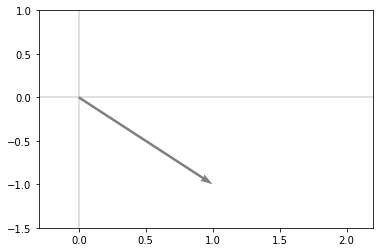

In [ ]:
import numpy as np
v = np.array([1, -1])

import matplotlib.pyplot as plt
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color="gray")
plt.xlim(-0.3, 2.2)
plt.ylim(-1.5, 1)
from matplotlib import ticker
# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)
plt.show()

In [ ]:
#!pip install imbalanced-learn==0.5.0
#!pip install scikit-learn==0.22.1
#!pip install tensorflow==2.1.0
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

In [ ]:
''' from zipfile import ZipFile
zf = ZipFile('/content/data.zip', 'r')
zf.extractall('/content/sample_data')
zf.close() '''

" from zipfile import ZipFile\nzf = ZipFile('/content/data.zip', 'r')\nzf.extractall('/content/sample_data')\nzf.close() "

In [ ]:
path = '/content/sample_data/data'
files = glob.glob(path+"/*.csv")
print(files)
li = []
df = pd.DataFrame()
for f in files:
    #csv = pd.read_csv(f)
    #df = df.append(csv)
    df = pd.read_csv(f)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)
#print(df)
df.to_csv('/content/sample_data/final_csv.csv')

['/content/sample_data/data/SC4171E0-PSG.edf.csv', '/content/sample_data/data/SC4092E0-PSG.edf.csv', '/content/sample_data/data/SC4191E0-PSG.edf.csv', '/content/sample_data/data/SC4072E0-PSG.edf.csv', '/content/sample_data/data/SC4121E0-PSG.edf.csv', '/content/sample_data/data/SC4041E0-PSG.edf.csv', '/content/sample_data/data/SC4042E0-PSG.edf.csv', '/content/sample_data/data/SC4182E0-PSG.edf.csv', '/content/sample_data/data/SC4052E0-PSG.edf.csv', '/content/sample_data/data/SC4081E0-PSG.edf.csv', '/content/sample_data/data/SC4071E0-PSG.edf.csv', '/content/sample_data/data/SC4131E0-PSG.edf.csv', '/content/sample_data/data/SC4091E0-PSG.edf.csv', '/content/sample_data/data/SC4101E0-PSG.edf.csv', '/content/sample_data/data/SC4051E0-PSG.edf.csv', '/content/sample_data/data/SC4192E0-PSG.edf.csv', '/content/sample_data/data/SC4061E0-PSG.edf.csv', '/content/sample_data/data/SC4102E0-PSG.edf.csv', '/content/sample_data/data/SC4152E0-PSG.edf.csv', '/content/sample_data/data/SC4021E0-PSG.edf.csv',

In [ ]:
df = df.dropna(how = 'all')
df = df.dropna(how='any',axis=0)

In [ ]:
print(df)

       average_amplitude_change     variance        std  sum_square_root  \
0                     -0.004273    44.274124   6.653881         5.211563   
1                      0.006866    49.242775   7.017320         5.258031   
2                     -0.001326    31.504816   5.612915         4.429189   
3                     -0.002505    65.010086   8.062883         5.824914   
4                      0.000442    37.042896   6.086288         4.740712   
...                         ...          ...        ...              ...   
41462                  0.021993  4504.957000  67.118980        52.554802   
41463                 -0.011507   266.469970  16.323908         8.970109   
41464                 -0.009187  1154.034500  33.971085        20.677422   
41465                 -0.006465  2190.406700  46.801780        31.416451   
41466                  0.000495  3182.770800  56.416050        42.742380   

       crest_factor      skew   kurtosis  hjorth_activity  hjorth_mobility  \
0        

In [ ]:
df.describe()

,average_amplitude_change,variance,std,sum_square_root,crest_factor,skew,kurtosis,hjorth_activity,hjorth_mobility,hjorth_complexity,...,slope_var,slope_mean,shannon_entropy,cA_mean,cA_std,cA_Energy,cD_mean,cD_std,cD_Energy,stage
count,41467.000000,41467.000000,41467.000000,41467.000000,41467.000000,41467.000000,41467.000000,41467.000000,41467.000000,41467.000000,...,41467.000000,41467.000000,4.146700e+04,41467.000000,41467.000000,4.146700e+04,41467.000000,41467.000000,4.146700e+04,41467.000000
mean,0.000058,172.946480,11.376086,8.535243,4.429343,0.017525,1.635356,172.946480,0.429361,3.692010,...,42.564858,-0.038125,-5.079437e+06,0.088562,15.585232,4.943904e+05,-0.002124,2.655167,2.659949e+04,2.041648
std,0.006047,255.677463,6.597894,4.732248,0.968817,0.386447,2.448035,255.677463,0.294832,1.639912,...,173.476204,0.191889,9.359568e+06,0.990906,9.234046,7.499756e+05,0.387217,3.241880,1.198483e+05,1.307727
min,-0.067863,6.959928,2.638167,2.160473,1.721144,-4.142779,-1.537981,6.959928,0.051713,1.009270,...,0.633852,-3.052470,-1.919509e+08,-5.427225,3.568887,2.021969e+04,-14.110163,0.513661,3.963232e+02,0.000000
25%,-0.002700,47.537995,6.894780,5.332680,3.751913,-0.120806,0.309191,47.537995,0.251910,2.679209,...,4.517806,-0.025989,-5.195692e+06,-0.533871,9.379207,1.332942e+05,-0.032029,1.278162,2.462765e+03,1.000000
50%,0.000085,92.556490,9.620628,7.256794,4.230398,0.038195,0.833830,92.556490,0.347459,3.367513,...,6.808364,-0.000133,-2.209016e+06,0.003758,12.982480,2.540768e+05,-0.000142,1.551526,3.624747e+03,2.000000
75%,0.002797,190.832165,13.814201,10.277292,4.907150,0.192275,1.985016,190.832165,0.464666,4.439031,...,15.263704,0.022751,-9.812344e+05,0.643488,18.877852,5.369256e+05,0.033007,2.315473,8.105940e+03,3.000000
max,0.064339,4858.581500,69.703530,56.710469,14.389676,5.648713,54.841209,4858.581500,1.981137,23.596357,...,6863.824918,1.467566,-8.562021e+04,4.659158,97.666140,1.432717e+07,13.009872,57.880157,5.067004e+06,4.000000


In [ ]:
''' old_names = ['0', '1', '2', '3', '4']
new_names = ['Wake', 'N1', 'N2', 'N3', 'N4']
df = df.rename(columns=dict(zip(old_names, new_names)), inplace=True) '''

" old_names = ['0', '1', '2', '3', '4'] \nnew_names = ['Wake', 'N1', 'N2', 'N3', 'N4']\ndf = df.rename(columns=dict(zip(old_names, new_names)), inplace=True) "

In [ ]:
''' df['stage'] = df['stage'].replace([0],'Wake')
df['stage'] = df['stage'].replace([1],'N1')
df['stage'] = df['stage'].replace([2],'N2')
df['stage'] = df['stage'].replace([3],'N3')
df['stage'] = df['stage'].replace([4],'REM') '''

" df['stage'] = df['stage'].replace([0],'Wake')\ndf['stage'] = df['stage'].replace([1],'N1')\ndf['stage'] = df['stage'].replace([2],'N2')\ndf['stage'] = df['stage'].replace([3],'N3')\ndf['stage'] = df['stage'].replace([4],'REM') "

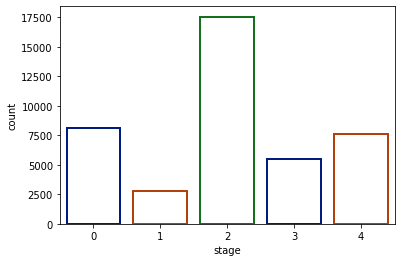

In [ ]:
sns.countplot(x="stage", data=df
              ,facecolor=(0, 0, 0, 0),
              linewidth=2,
              edgecolor=sns.color_palette("dark", 3))

In [ ]:
tagert_encoding = df['stage']

In [ ]:
df2 = df.drop('stage',axis=1)

In [ ]:
pd.DataFrame(tagert_encoding).value_counts()

stage
2        17549
0         8097
4         7592
3         5483
1         2746
dtype: int64

In [ ]:
#!pip install category_encoders
#import category_encoders as ce
#column4=df2.columns
#encoder4 = ce.TargetEncoder(cols=[x for x in column4])
#target_encoding=np.array(tagert_encoding)
#target_encoder_all= encoder4.fit_transform(df2,target_encoding)

In [ ]:
one_hot_r=pd.get_dummies(df2, prefix_sep='_', drop_first=False)
target5=np.array(one_hot_r)
X = df2
y = np.array(tagert_encoding)
print(X.shape,y.shape)

(41467, 20) (41467,)


In [ ]:
#from sklearn.preprocessing import RobustScaler
#transformer = RobustScaler().fit(X)
#X = transformer.transform(X)

In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(X)
#cumsum = np.cumsum(pca.explained_variance_ratio_)
#d = np.argmax(cumsum >= 0.99999) + 1
#print(d)

In [ ]:
#pca = PCA(n_components=d)
#X = pca.fit_transform(X)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not minority',random_state=10)
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape, y_sm.shape)

(72942, 20) (72942,)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled =rus.fit_resample(X, y)
print(X_resampled.shape, y_resampled.shape)

(13730, 20) (13730,)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

OS =RandomOverSampler(sampling_strategy='auto', random_state=0)
X_ros, y_ros = OS.fit_resample(X, y)
print(X_ros.shape, y_ros.shape)

(87745, 20) (87745,)


In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)
print(X_tl.shape, y_tl.shape)

(31956, 20) (31956,)


In [ ]:
y_resampled

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
X_sm1, y_sm1 =pd.DataFrame(X_sm), pd.DataFrame (y_sm)
X_rus1, y_rus1 =pd.DataFrame(X_resampled), pd.DataFrame (y_resampled)
X_tl1, y_tl1  =pd.DataFrame(X_tl), pd.DataFrame (y_tl)
X_ros1, y_ros1  =pd.DataFrame(X_ros), pd.DataFrame (y_ros)
X1, y1  =pd.DataFrame(X), pd.DataFrame (y)

In [ ]:
df5 = pd.concat([pd.DataFrame(X_rus1),pd.DataFrame(X_sm1),pd.DataFrame(X_ros1)])
print(df5.shape)
target5 = pd.concat([pd.DataFrame(y_rus1),pd.DataFrame(y_sm1),pd.DataFrame(y_ros1)])
print(target5.shape)

(174417, 20)
(174417, 1)


In [ ]:
''' target5[0] = target5[0].replace([0],'Wake')
target5[0] = target5[0].replace([1],'N1')
target5[0] = target5[0].replace([2],'N2')
target5[0] = target5[0].replace([3],'N3')
target5[0] = target5[0].replace([4],'REM') '''

" target5[0] = target5[0].replace([0],'Wake')\ntarget5[0] = target5[0].replace([1],'N1')\ntarget5[0] = target5[0].replace([2],'N2')\ntarget5[0] = target5[0].replace([3],'N3')\ntarget5[0] = target5[0].replace([4],'REM') "

[Text(0.5, 0, 'Stage')]

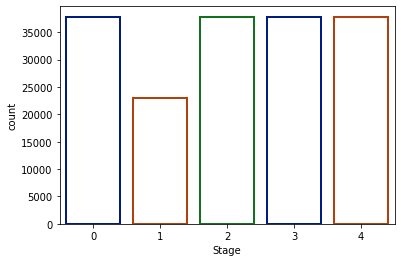

In [ ]:
ax = sns.countplot(x=0, data=target5
              ,facecolor=(0, 0, 0, 0),
              linewidth=2,
              edgecolor=sns.color_palette("dark", 3))
ax.set(xlabel="Stage")

In [ ]:
target5

,0
0,0
1,0
2,0
3,0
4,0
...,...
87740,4
87741,4
87742,4
87743,4


In [ ]:
pd.DataFrame(y_rus1).value_counts()

0    2746
1    2746
2    2746
3    2746
4    2746
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
target_combined = enc.fit_transform(target5).toarray()
print(target_combined.shape)

(174417, 5)


In [ ]:
target_combined1=pd.get_dummies(y_rus1, prefix_sep='_', drop_first=False)
target_combined1 = np.array(target_combined1)
df6 = np.array(df5)
print(target_combined1.shape)

(13730, 1)


In [ ]:
print(df5.shape)
print(target_combined.shape)

(174417, 20)
(174417, 5)


In [ ]:
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
target_combined = enc.fit_transform(target5).toarray()
print(target_combined.shape)

(174417, 5)


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set,target_train,target_test = train_test_split(np.array(df5),np.array(target5), test_size=0.2,random_state=21)
#train_set, test_set,target_train,target_test = train_test_split(X_cc, y_cc, test_size=0.3,random_state=0)
print(target_train.shape,target_test.shape)
print(test_set.shape)
print(train_set.shape)

(139533, 1) (34884, 1)
(34884, 20)
(139533, 20)


In [ ]:
print(test_set.shape)
df = pd.DataFrame(test_set)
df.to_csv('/content/sample_data/final_csv.csv', index=False)

(34884, 20)


In [ ]:
import tensorflow as tf
from tensorflow import nn
from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense,AveragePooling1D, Conv1D,Dropout,Conv2D,MaxPooling2D,Activation,Flatten,AveragePooling2D,GlobalMaxPooling2D,ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow import keras
from keras import layers

In [ ]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [ ]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [ ]:
''' from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense '''

' from tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense '

In [ ]:
model = Sequential()
model.add(layer=Conv1D(filters=8, kernel_size=5, activation='tanh',data_format='channels_last',padding='same'))
model.add(layer=Conv1D(filters=8, kernel_size=5, activation='swish',data_format='channels_last',padding='same'))
model.add(layer=AveragePooling1D(pool_size=2))
model.add(layer=Dropout(rate=0.25))
model.add(layer=Flatten())

In [ ]:
trainn = train_set.astype('float32')
testnn = test_set.astype('float32')

In [ ]:
''' print(np.array([[[1,2,3]]]).shape)
df = pd.DataFrame(testnn)
df.to_csv('/content/sample_data/final_csv.csv', index=False) '''

" print(np.array([[[1,2,3]]]).shape)\ndf = pd.DataFrame(testnn)\ndf.to_csv('/content/sample_data/final_csv.csv', index=False) "

In [ ]:
trainn = trainn.reshape(trainn.shape[0],trainn.shape[1],1)
testnn = testnn.reshape(testnn.shape[0],testnn.shape[1],1)

In [ ]:
start = time.clock()
train = model.predict(trainn)
print(train.shape)
end = time.clock()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


(139533, 80)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [ ]:
start = time.clock()
test = model.predict(testnn)
print(test.shape)
print(model)
end = time.clock()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


(34884, 80)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [ ]:
print(start-end)

-1.9264709999999994


In [ ]:
import sys
import traceback
try:
  model.summary()
  #from keras.utils.vis_utils import plot_model
  from tensorflow.keras.utils import plot_model
  #tf.keras.utils.plot_model(model, "info.png", show_shapes=True)
  plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
  #tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=True,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)
except AssertionError:
  _, _, tb = sys.exc_info()
  traceback.print_tb(tb) # Fixed format
  tb_info = traceback.extract_tb(tb)
  filename, line, func, text = tb_info[-1]
  print('An error occurred on line {} in statement {}'.format(line, text))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 20, 8)             48        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 20, 8)             328       
_________________________________________________________________
average_pooling1d (AveragePo (None, 10, 8)             0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 8)             0         
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________
An error occurred on line 311 in statement assert dot.get_node(inbound_layer_id)


  File "<ipython-input-50-57e4fb8a08b7>", line 8, in <module>
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/vis_utils.py", line 424, in plot_model
    show_layer_activations=show_layer_activations)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/vis_utils.py", line 311, in model_to_dot
    assert dot.get_node(inbound_layer_id)


In [ ]:
X_trainsm, X_testsm, y_trainsm, y_testsm= train,test,target_train,target_test

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [ ]:
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
import pandas as pd
import numpy as np
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
  if y_true.shape != y_pred.shape:
    print("Error! y_true %s is not the same shape as y_pred %s" % (
          y_true.shape,
          y_pred.shape)
        )
    return

  lb = LabelBinarizer()

  if len(y_true.shape) == 1:
        lb.fit(y_true)

  #Value counts of predictions
  labels, cnt = np.unique(y_pred,return_counts=True)
  n_classes = len(labels)
  pred_cnt = pd.Series(cnt, index=labels)

  metrics_summary = precision_recall_fscore_support(y_true=y_true,y_pred=y_pred,labels=labels)

  avg = list(precision_recall_fscore_support(y_true=y_true, y_pred=y_pred,average='weighted'))

  metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
  class_report_df = pd.DataFrame(list(metrics_summary),index=metrics_sum_index,columns=labels)

  support = class_report_df.loc['support']
  total = support.sum()
  class_report_df['avg / total'] = avg[:-1] + [total]

  class_report_df = class_report_df.T
  class_report_df['pred'] = pred_cnt
  class_report_df['pred'].iloc[-1] = total

  if not (y_score is None):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for label_it, label in enumerate(labels):
      fpr[label], tpr[label], _ = roc_curve((y_true == label).astype(int), y_score[:, label_it])
      roc_auc[label] = auc(fpr[label], tpr[label])

    if average == 'micro':
      if n_classes <= 2:
        fpr["avg / total"], tpr["avg / total"], _ = roc_curve(lb.transform(y_true).ravel(), y_score[:, 1].ravel())
      else:
        fpr["avg / total"], tpr["avg / total"], _ = roc_curve(lb.transform(y_true).ravel(), y_score.ravel())

      roc_auc["avg / total"] = auc(fpr["avg / total"],tpr["avg / total"])

    elif average == 'macro':
      # First aggregate all false positive rates
      all_fpr = np.unique(np.concatenate([fpr[i] for i in labels]))
      # Then interpolate all ROC curves at this points
      mean_tpr = np.zeros_like(all_fpr)
      for i in labels:
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
      mean_tpr /= n_classes
      fpr["macro"] = all_fpr
      tpr["macro"] = mean_tpr
      roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

    class_report_df['AUC'] = pd.Series(roc_auc)

  return class_report_df

In [ ]:
log_clf = LogisticRegression(penalty='l2',max_iter=1000,C=1,solver='lbfgs',l1_ratio=None)
log_clf.fit(X_trainsm, y_trainsm)
y_pred_trainsmlog_clf = log_clf.predict(X_trainsm)
y_predsmlog_clf = log_clf.predict(X_testsm)
accuracy_trainsm = accuracy_score(y_trainsm, y_pred_trainsmlog_clf)
accuracysm = accuracy_score(y_testsm, y_predsmlog_clf)
print("Accuracysm of log_clf: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm of log_clf: %.2f%%" % (accuracy_trainsm * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracysm of log_clf: 61.66%
Accuracy trainsm of log_clf: 61.34%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
probas1 = log_clf.predict_proba(X_testsm)

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


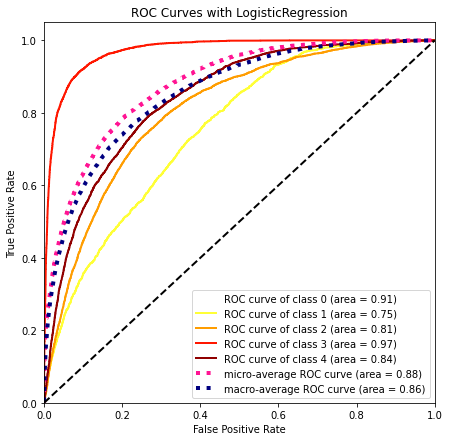

In [ ]:
skplt.metrics.plot_roc_curve(y_testsm,probas1,title="ROC Curves with LogisticRegression", cmap='hot_r', figsize=[7,7])
plt.show()

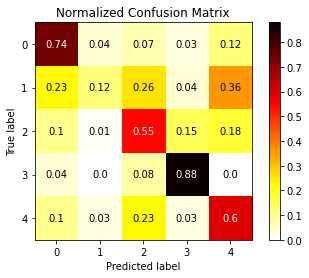

' \nlabels = ["Awake", "Stage 1", "Stage 2","Stage 3","Stage 4"]\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import f1_score\nfrom sklearn.metrics import precision_score\nfrom sklearn.metrics import recall_score\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.metrics import ConfusionMatrixDisplay\n\nplt.figure(figsize=(12, 4))\nlabels = ["Awake", "Stage 1", "Stage 2","Stage 3","Stage 4"]\nfrom sklearn.metrics import confusion_matrix\nmatrix_confusion = confusion_matrix(y_testsm,y_predsmlog_clf)\n#sns.heatmap(matrix_confusion, square=True, annot=True, cmap=\'Blues\', fmt=\'d\', cbar=False)\ndisp = ConfusionMatrixDisplay(confusion_matrix=matrix_confusion, display_labels=labels)\ndisp.plot(cmap=plt.cm.Blues)\nplt.show() '

In [ ]:

skplt.metrics.plot_confusion_matrix(y_testsm,y_predsmlog_clf, normalize=True, cmap='hot_r')
plt.show()

'''
labels = ["Awake", "Stage 1", "Stage 2","Stage 3","Stage 4"]
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(12, 4))
labels = ["Awake", "Stage 1", "Stage 2","Stage 3","Stage 4"]
from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_testsm,y_predsmlog_clf)
#sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_confusion, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show() '''

In [ ]:
RandomForest=RandomForestClassifier(bootstrap= False,max_depth= 30,max_features= 1,min_samples_leaf= 1,min_samples_split= 5,n_estimators= 50)

In [ ]:
start = time.clock()
RandomForest.fit(X_trainsm, y_trainsm)
y_pred_trainsm_rnd = RandomForest.predict(X_trainsm)
y_predsm_rnd = RandomForest.predict(X_testsm)
accuracy_trainsm = accuracy_score(y_trainsm, y_pred_trainsm_rnd)
accuracysm = accuracy_score(y_testsm, y_predsm_rnd)
print("Accuracysm of CNN + random_forest: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm of CNN + random_forest: %.2f%%" % (accuracy_trainsm * 100.0))
end = time.clock()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracysm of CNN + random_forest: 95.92%
Accuracy trainsm of CNN + random_forest: 99.84%


In [ ]:
''' from sklearn.tree import export_graphviz
estimator = RandomForest.estimators_[5]
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot',
                feature_names = X_trainsm,
                class_names = y_trainsm,
                rounded = True, proportion = False,
                precision = 2, filled = True) '''

" from sklearn.tree import export_graphviz\nestimator = RandomForest.estimators_[5]\nfrom sklearn.tree import export_graphviz\nexport_graphviz(estimator, out_file='tree.dot', \n                feature_names = X_trainsm,\n                class_names = y_trainsm,\n                rounded = True, proportion = False, \n                precision = 2, filled = True) "

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
cv_results = cross_validate(RandomForest,X_trainsm, y_trainsm, cv=10)
sorted(cv_results.keys())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

['fit_time', 'score_time', 'test_score']

In [ ]:
cv_results['test_score']

array([0.95112513, 0.95298839, 0.95306005, 0.95334337, 0.95363004,
       0.94983158, 0.95456174, 0.95449007, 0.95370171, 0.95169498])

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
import numpy as np
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
  if y_true.shape != y_pred.shape:
    print("Error! y_true %s is not the same shape as y_pred %s" % (
          y_true.shape,
          y_pred.shape)
        )
    return

  lb = LabelBinarizer()

  if len(y_true.shape) == 1:
        lb.fit(y_true)

  #Value counts of predictions
  labels, cnt = np.unique(y_pred,return_counts=True)
  n_classes = len(labels)
  pred_cnt = pd.Series(cnt, index=labels)

  metrics_summary = precision_recall_fscore_support(y_true=y_true,y_pred=y_pred,labels=labels)

  avg = list(precision_recall_fscore_support(y_true=y_true, y_pred=y_pred,average='weighted'))

  metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
  class_report_df = pd.DataFrame(list(metrics_summary),index=metrics_sum_index,columns=labels)

  support = class_report_df.loc['support']
  total = support.sum()
  class_report_df['avg / total'] = avg[:-1] + [total]

  class_report_df = class_report_df.T
  class_report_df['pred'] = pred_cnt
  class_report_df['pred'].iloc[-1] = total

  if not (y_score is None):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for label_it, label in enumerate(labels):
      fpr[label], tpr[label], _ = roc_curve((y_true == label).astype(int), y_score[:, label_it])
      roc_auc[label] = auc(fpr[label], tpr[label])

    if average == 'micro':
      if n_classes <= 2:
        fpr["avg / total"], tpr["avg / total"], _ = roc_curve(lb.transform(y_true).ravel(), y_score[:, 1].ravel())
      else:
        fpr["avg / total"], tpr["avg / total"], _ = roc_curve(lb.transform(y_true).ravel(), y_score.ravel())

      roc_auc["avg / total"] = auc(fpr["avg / total"],tpr["avg / total"])

    elif average == 'macro':
      # First aggregate all false positive rates
      all_fpr = np.unique(np.concatenate([fpr[i] for i in labels]))
      # Then interpolate all ROC curves at this points
      mean_tpr = np.zeros_like(all_fpr)
      for i in labels:
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
      mean_tpr /= n_classes
      fpr["macro"] = all_fpr
      tpr["macro"] = mean_tpr
      roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

    class_report_df['AUC'] = pd.Series(roc_auc)

  return class_report_df

In [ ]:
probas2 = RandomForest.predict_proba(X_testsm)

In [ ]:
df = pd.DataFrame(probas2)
df.to_csv('/content/sample_data/final_csv.csv', index=False)

In [ ]:
report_with_auc = class_report(
    y_true=y_testsm.ravel(),
    y_pred=RandomForest.predict(X_testsm),
    y_score=RandomForest.predict_proba(X_testsm))
print("RandomForest\n",report_with_auc)

RandomForest
              precision    recall  f1-score  support     pred       AUC
0             0.976235  0.962588  0.969364   7511.0   7406.0  0.997829
1             0.997167  1.000000  0.998582   4576.0   4589.0  1.000000
2             0.922221  0.953452  0.937576   7648.0   7907.0  0.995155
3             0.980605  0.975775  0.978184   7513.0   7476.0  0.999056
4             0.956168  0.939890  0.947959   7636.0   7506.0  0.995785
avg / total   0.963687  0.963364  0.963442  34884.0  34884.0  0.997924


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_testsm.ravel(), RandomForest.predict(X_testsm))


0.9538640184061631

In [ ]:
class_report

<function __main__.class_report(y_true, y_pred, y_score=None, average='micro')>

In [ ]:
print("Macro f1 score: ",np.average(report_with_auc['f1-score']))

Macro f1 score:  0.9658511138824858


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


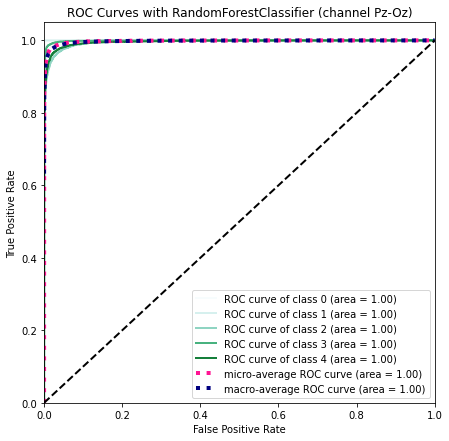

In [ ]:
skplt.metrics.plot_roc_curve(y_testsm,probas2,title="ROC Curves with RandomForestClassifier (channel Pz-Oz)", cmap='BuGn', figsize=[7,7])
plt.show()

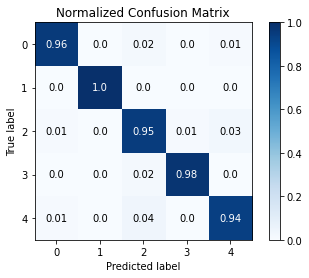

<Figure size 1080x1080 with 0 Axes>

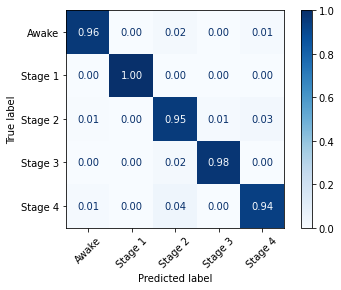

In [ ]:
skplt.metrics.plot_confusion_matrix(y_testsm,y_predsm_rnd, normalize=True,cmap='Blues')
plt.show()

labels = ["Awake", "Stage 1", "Stage 2","Stage 3","Stage 4"]
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(15, 15))
labels = ["Awake", "Stage 1", "Stage 2","Stage 3","Stage 4"]
from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_testsm,y_predsm_rnd, normalize='true')
#sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_confusion, display_labels=labels)
plt.tight_layout()
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45,values_format = '.2f', ax=None, colorbar=True)
plt.show()

In [ ]:
''' import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('_mpl-gallery')
# make data

# plot
fig, ax = plt.subplots()

ax.step(x, y, linewidth=2.5)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show() '''

" import matplotlib.pyplot as plt\nimport numpy as np\n#plt.style.use('_mpl-gallery')\n# make data\n\n# plot\nfig, ax = plt.subplots()\n\nax.step(x, y, linewidth=2.5)\n\nax.set(xlim=(0, 8), xticks=np.arange(1, 8),\n       ylim=(0, 8), yticks=np.arange(1, 8))\n\nplt.show() "

[4, 3, 1, 2, 0, 1, 0, 3, 3, 2, 3, 2, 2, 0, 2, 2, 3, 1, 2, 2, 2, 4, 2, 3, 1, 1, 2, 0, 1, 1, 2, 2, 3, 4, 4, 4, 2, 2, 2, 2, 4, 0, 1, 0, 2, 3, 3, 0, 1, 4, 1, 2, 2, 0, 3, 4, 0, 3, 2, 2, 2, 0, 4, 4, 4, 3, 1, 2, 1, 4, 3, 4, 4, 3, 4, 0, 4, 0, 3, 1, 2, 4, 4, 1, 2, 3, 2, 3, 1, 4, 3, 0, 4, 0, 1, 0, 4, 0, 2, 0, 4, 2, 2, 3, 3, 4, 4, 3, 2, 0, 2, 3, 4, 0, 0, 1, 1, 0, 3, 2, 0, 3, 4, 4, 4, 4, 4, 2, 3, 3, 4, 2, 4, 4, 0, 4, 0, 3, 2, 2, 0, 3, 1, 2, 0, 1, 4, 4, 3, 0, 0, 3, 3, 2, 2, 0, 3, 4, 4, 2, 2, 3, 1, 1, 3, 0, 4, 3, 1, 2, 2, 3, 3, 1, 3, 3, 1, 2, 4, 4, 0, 2, 3, 4, 3, 2, 3, 4, 2, 3, 0, 2, 0, 4, 2, 4, 2, 4, 4, 0, 1, 4, 0, 4, 0, 2, 0, 3, 0, 2, 3, 0, 0, 3, 1, 1, 2, 0, 4, 3, 0, 4, 2, 4, 1, 4, 1, 1, 3, 2, 4, 0, 2, 1, 4, 4, 4, 0, 4, 2, 1, 1, 2, 2, 0, 0, 3, 1, 1, 4, 4, 3, 3, 2, 3, 3, 4, 0, 4, 1, 0, 4, 4, 0, 3, 3, 0, 0, 4, 3, 2, 0, 3, 3, 3, 0, 3, 2, 4, 1, 2, 4, 0, 3, 4, 3, 4, 4, 4, 0, 4, 3, 0, 4, 2, 4, 1, 0, 3, 4, 2, 0, 2, 3, 2, 2, 4, 3, 0, 1, 1, 4, 2, 3, 3, 3, 0, 3, 4, 4, 3, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 3, 

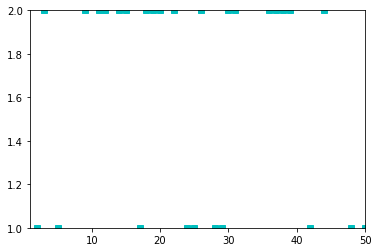

In [ ]:


y_trainsm12 = pd.DataFrame(y_trainsm)
#df = pd.DataFrame(np.delete(target_test, [1], axis=1))
#df = pd.DataFrame(y_predict.argmax(axis=1))
predicted_Y = (probas2 == probas2.max(axis=1, keepdims=1)).astype(float)
df = pd.DataFrame(y_trainsm12)
#df = pd.DataFrame(target_test)
#print(df)
df.to_csv('/content/sample_data/final_csv.csv', index=False)

model_result = [];
model_result_index = [];
idx = 0
for arr in predicted_Y:
  result = np.where(arr == np.amax(arr))
  model_result.append(result[0][0])
  model_result_index.append(idx)
  idx += 1
  #print(result[0])
print(model_result)
print(model_result_index)
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('_mpl-gallery')
# make data

# plot
x = model_result_index
y = model_result

plt.step(x, y, 'cs', where='mid')
plt.xlim(1, 50)
plt.ylim(1,2,3, 4)
plt.show()



In [ ]:
trying = np.array([[-0.001375328,859.123,29.3108,23.01605729,3.200448,-0.005156594,0.051136255,859.123,0.1631018,4.7619524,62.286045,-27993180,0.73400635,41.429024,2578788,0.036823373,1.7716062,4716.1973]])
testnn_tryping = trying.astype('float32')

testnn_trying = testnn_tryping.reshape(testnn_tryping.shape[0],testnn_tryping.shape[1],1)
test_trying = model.predict(testnn_trying)
y_predsmlog_clf = log_clf.predict(test_trying)
y_predsmlog_clf = log_clf.predict(test_trying)
probas2_final_result = RandomForest.predict(test_trying)
#probas2_final_result = RandomForest.predict_proba(test_trying)
print(probas2_final_result)
''' df = pd.DataFrame(probas2_final_result) '''
''' df.to_csv('/content/sample_data/final_csv.csv', index=False) '''

ValueError: ignored

In [ ]:
''' import csv
items = []
files = glob.glob('/content/SC4192E0-PSG.edf.csv')
print(files)
li = []
df = pd.DataFrame()
for f in files:
    #csv = pd.read_csv(f)
    #df = df.append(csv)
    df = df3 = pd.read_csv(f)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)


df = df.dropna(how = 'all')
df = df.dropna(how='any',axis=0)
df = df.drop('stage',axis=1)

trying = np.array(df)
testnn_tryping = trying.astype('float32')
testnn_trying = testnn_tryping.reshape(testnn_tryping.shape[0],testnn_tryping.shape[1],1)
test_trying = model.predict(testnn_trying)
y_predsmlog_clf = log_clf.predict(test_trying)
y_predsmlog_clf = log_clf.predict(test_trying)
probas2_final_result = RandomForest.predict(test_trying)
#probas2_final_result = RandomForest.predict_proba(test_trying)
print(probas2_final_result)
df = pd.DataFrame(probas2_final_result)
df.to_csv('/content/sample_data/final_csv.csv', index=False) '''

In [ ]:
''' import csv
items = []
files = glob.glob('/content/SC4192E0-PSG.edf.csv')
print(files)
li = []
df = pd.DataFrame()
for f in files:
    #csv = pd.read_csv(f)
    #df = df.append(csv)
    df = df3 = pd.read_csv(f)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)
result = []
'''
''' df = df.dropna(how = 'all')
df = df.dropna(how='any',axis=0)
df = df.drop('stage',axis=1)
for row in np.array(df):
  items.append(row)
  testnn_tryping = np.array(items).astype('float32')
  testnn_trying = testnn_tryping.reshape(testnn_tryping.shape[0],testnn_tryping.shape[1],1)
  test_trying = model.predict(testnn_trying)
  y_predsmlog_clf = log_clf.predict(test_trying)
  y_predsmlog_clf = log_clf.predict(test_trying)
  probas2_final_result = RandomForest.predict(test_trying)
  #probas2_final_result = RandomForest.predict_proba(test_trying)
  print(probas2_final_result)
  items = []
  result.append(probas2_final_result)
pd = pd.DataFrame(result)
pd.to_csv('/content/sample_data/final_csv.csv', index=False) '''

In [ ]:
import csv
items = []
files = glob.glob('/content/SC4001E0-PSG.edf.csv')
print(files)
li = []
df = pd.DataFrame()
for f in files:
    #csv = pd.read_csv(f)
    #df = df.append(csv)
    df = df3 = pd.read_csv(f)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)
result = []

df = df.dropna(how = 'all')
df = df.dropna(how='any',axis=0)
df = df.drop('stage',axis=1)
for row in np.array(df):
  items.append(row)
  testnn_tryping = np.array(items).astype('float32')
  testnn_trying = testnn_tryping.reshape(testnn_tryping.shape[0],testnn_tryping.shape[1],1)
  test_trying = model.predict(testnn_trying)
  y_predsmlog_clf = log_clf.predict(test_trying)
  y_predsmlog_clf = log_clf.predict(test_trying)
  probas2_final_result = RandomForest.predict(test_trying)
  #probas2_final_result = RandomForest.predict_proba(test_trying)
  print(probas2_final_result)
  items = []
  result.append(probas2_final_result)
pd = pd.DataFrame(result)
pd.to_csv('/content/sample_data/final_csv.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('_mpl-gallery')
# make data

# plot
predicted_data = np.array([
  [0,1  ],
  [0,2  ],
  [0,3  ],
  [0,4  ],
  [0,5  ],
  [0,6  ],
  [0,7  ],
  [0,8  ],
  [0,9  ],
  [0,10  ],
  [0,11  ],
  [0,12  ],
  [0,13  ],
  [0,14  ],
  [0,15  ],
  [0,16  ],
  [0,17  ],
  [0,18  ],
  [0,19  ],
  [0,20  ],
  [0,21  ],
  [0,22  ],
  [0,23  ],
  [0,24  ],
  [0,25  ],
  [0,26  ],
  [0,27  ],
  [0,28  ],
  [0,29  ],
  [0,30  ],
  [0,31  ],
  [0,32  ],
  [0,33  ],
  [0,34  ],
  [0,35  ],
  [0,36  ],
  [0,37  ],
  [0,38  ],
  [0,39  ],
  [0,40  ],
  [0,41  ],
  [0,42  ],
  [0,43  ],
  [0,44  ],
  [0,45  ],
  [0,46  ],
  [0,47  ],
  [0,48  ],
  [0,49  ],
  [0,50  ],
  [0,51  ],
  [0,52  ],
  [0,53  ],
  [0,54  ],
  [0,55  ],
  [0,56  ],
  [0,57  ],
  [0,58  ],
  [0,59  ],
  [0,60  ],
  [0,61  ],
  [0,62  ],
  [0,63  ],
  [0,64  ],
  [1,65  ],
  [0,66  ],
  [1,67  ],
  [0,68  ],
  [0,69  ],
  [1,70  ],
  [0,71  ],
  [0,72  ],
  [0,73  ],
  [0,74  ],
  [0,75  ],
  [0,76  ],
  [0,77  ],
  [0,78  ],
  [0,79  ],
  [0,80  ],
  [0,81  ],
  [0,82  ],
  [0,83  ],
  [0,84  ],
  [0,85  ],
  [0,86  ],
  [0,87  ],
  [0,88  ],
  [0,89  ],
  [0,90  ],
  [0,91  ],
  [0,92  ],
  [1,93  ],
  [1,94  ],
  [0,95  ],
  [0,96  ],
  [0,97  ],
  [0,98  ],
  [0,99  ],
  [0,100  ],
  [0,101  ],
  [0,102  ],
  [0,103  ],
  [0,104  ],
  [0,105  ],
  [0,106  ],
  [0,107  ],
  [0,108  ],
  [0,109  ],
  [0,110  ],
  [0,111  ],
  [0,112  ],
  [0,113  ],
  [0,114  ],
  [0,115  ],
  [0,116  ],
  [0,117  ],
  [0,118  ],
  [0,119  ],
  [0,120  ],
  [0,121  ],
  [0,122  ],
  [0,123  ],
  [0,124  ],
  [0,125  ],
  [0,126  ],
  [0,127  ],
  [0,128  ],
  [0,129  ],
  [0,130  ],
  [0,131  ],
  [0,132  ],
  [0,133  ],
  [0,134  ],
  [0,135  ],
  [0,136  ],
  [0,137  ],
  [0,138  ],
  [0,139  ],
  [0,140  ],
  [0,141  ],
  [0,142  ],
  [0,143  ],
  [0,144  ],
  [0,145  ],
  [0,146  ],
  [0,147  ],
  [0,148  ],
  [0,149  ],
  [0,150  ],
  [0,151  ],
  [0,152  ],
  [0,153  ],
  [0,154  ],
  [0,155  ],
  [0,156  ],
  [0,157  ],
  [0,158  ],
  [0,159  ],
  [0,160  ],
  [0,161  ],
  [0,162  ],
  [2,163  ],
  [0,164  ],
  [0,165  ],
  [0,166  ],
  [0,167  ],
  [0,168  ],
  [0,169  ],
  [0,170  ],
  [0,171  ],
  [0,172  ],
  [0,173  ],
  [0,174  ],
  [0,175  ],
  [0,176  ],
  [0,177  ],
  [1,178  ],
  [0,179  ],
  [0,180  ],
  [0,181  ],
  [0,182  ],
  [0,183  ],
  [0,184  ],
  [0,185  ],
  [0,186  ],
  [0,187  ],
  [0,188  ],
  [0,189  ],
  [0,190  ],
  [0,191  ],
  [0,192  ],
  [0,193  ],
  [0,194  ],
  [0,195  ],
  [0,196  ],
  [0,197  ],
  [0,198  ],
  [0,199  ],
  [0,200  ],
  [0,201  ],
  [0,202  ],
  [0,203  ],
  [0,204  ],
  [0,205  ],
  [0,206  ],
  [0,207  ],
  [0,208  ],
  [2,209  ],
  [0,210  ],
  [0,211  ],
  [0,212  ],
  [0,213  ],
  [0,214  ],
  [0,215  ],
  [0,216  ],
  [0,217  ],
  [0,218  ],
  [0,219  ],
  [2,220  ],
  [0,221  ],
  [2,222  ],
  [2,223  ],
  [2,224  ],
  [2,225  ],
  [2,226  ],
  [2,227  ],
  [2,228  ],
  [2,229  ],
  [2,230  ],
  [2,231  ],
  [2,232  ],
  [2,233  ],
  [2,234  ],
  [2,235  ],
  [2,236  ],
  [2,237  ],
  [2,238  ],
  [2,239  ],
  [2,240  ],
  [2,241  ],
  [2,242  ],
  [2,243  ],
  [2,244  ],
  [2,245  ],
  [2,246  ],
  [2,247  ],
  [2,248  ],
  [2,249  ],
  [2,250  ],
  [2,251  ],
  [2,252  ],
  [2,253  ],
  [2,254  ],
  [2,255  ],
  [2,256  ],
  [2,257  ],
  [3,258  ],
  [3,259  ],
  [3,260  ],
  [2,261  ],
  [2,262  ],
  [2,263  ],
  [2,264  ],
  [2,265  ],
  [3,266  ],
  [2,267  ],
  [2,268  ],
  [2,269  ],
  [2,270  ],
  [2,271  ],
  [3,272  ],
  [3,273  ],
  [3,274  ],
  [3,275  ],
  [3,276  ],
  [3,277  ],
  [3,278  ],
  [3,279  ],
  [3,280  ],
  [3,281  ],
  [3,282  ],
  [3,283  ],
  [3,284  ],
  [3,285  ],
  [3,286  ],
  [3,287  ],
  [3,288  ],
  [3,289  ],
  [3,290  ],
  [3,291  ],
  [3,292  ],
  [3,293  ],
  [3,294  ],
  [3,295  ],
  [3,296  ],
  [3,297  ],
  [3,298  ],
  [3,299  ],
  [2,300  ],
  [3,301  ],
  [3,302  ],
  [3,303  ],
  [3,304  ],
  [3,305  ],
  [3,306  ],
  [3,307  ],
  [3,308  ],
  [3,309  ],
  [3,310  ],
  [3,311  ],
  [3,312  ],
  [3,313  ],
  [3,314  ],
  [3,315  ],
  [3,316  ],
  [3,317  ],
  [3,318  ],
  [0,319  ],
  [0,320  ],
  [0,321  ],
  [0,322  ],
  [0,323  ],
  [0,324  ],
  [0,325  ],
  [2,326  ],
  [2,327  ],
  [2,328  ],
  [2,329  ],
  [2,330  ],
  [2,331  ],
  [2,332  ],
  [2,333  ],
  [0,334  ],
  [2,335  ],
  [2,336  ],
  [2,337  ],
  [0,338  ],
  [0,339  ],
  [0,340  ],
  [0,341  ],
  [0,342  ],
  [0,343  ],
  [0,344  ],
  [0,345  ],
  [0,346  ],
  [0,347  ],
  [0,348  ],
  [0,349  ],
  [0,350  ],
  [0,351  ],
  [0,352  ],
  [0,353  ],
  [0,354  ],
  [0,355  ],
  [0,356  ],
  [0,357  ],
  [0,358  ],
  [0,359  ],
  [0,360  ],
  [4,361  ],
  [4,362  ],
  [4,363  ],
  [1,364  ],
  [4,365  ],
  [4,366  ],
  [4,367  ],
  [4,368  ],
  [4,369  ],
  [4,370  ],
  [4,371  ],
  [4,372  ],
  [4,373  ],
  [4,374  ],
  [4,375  ],
  [4,376  ],
  [4,377  ],
  [4,378  ],
  [4,379  ],
  [4,380  ],
  [4,381  ],
  [4,382  ],
  [4,383  ],
  [4,384  ],
  [4,385  ],
  [4,386  ],
  [0,387  ],
  [0,388  ],
  [4,389  ],
  [4,390  ],
  [4,391  ],
  [4,392  ],
  [4,393  ],
  [4,394  ],
  [0,395  ],
  [2,396  ],
  [4,397  ],
  [4,398  ],
  [4,399  ],
  [2,400  ],
  [2,401  ],
  [2,402  ],
  [2,403  ],
  [2,404  ],
  [2,405  ],
  [2,406  ],
  [0,407  ],
  [2,408  ],
  [2,409  ],
  [2,410  ],
  [2,411  ],
  [2,412  ],
  [2,413  ],
  [2,414  ],
  [2,415  ],
  [2,416  ],
  [2,417  ],
  [2,418  ],
  [2,419  ],
  [0,420  ],
  [0,421  ],
  [0,422  ],
  [0,423  ],
  [2,424  ],
  [2,425  ],
  [0,426  ],
  [2,427  ],
  [2,428  ],
  [2,429  ],
  [2,430  ],
  [2,431  ],
  [2,432  ],
  [0,433  ],
  [0,434  ],
  [0,435  ],
  [0,436  ],
  [0,437  ],
  [0,438  ],
  [0,439  ],
  [2,440  ],
  [2,441  ],
  [2,442  ],
  [2,443  ],
  [2,444  ],
  [2,445  ],
  [2,446  ],
  [2,447  ],
  [2,448  ],
  [2,449  ],
  [2,450  ],
  [2,451  ],
  [2,452  ],
  [0,453  ],
  [2,454  ],
  [2,455  ],
  [2,456  ],
  [2,457  ],
  [2,458  ],
  [2,459  ],
  [0,460  ],
  [2,461  ],
  [2,462  ],
  [2,463  ],
  [2,464  ],
  [2,465  ],
  [2,466  ],
  [2,467  ],
  [2,468  ],
  [2,469  ],
  [2,470  ],
  [2,471  ],
  [2,472  ],
  [2,473  ],
  [2,474  ],
  [2,475  ],
  [2,476  ],
  [2,477  ],
  [2,478  ],
  [2,479  ],
  [2,480  ],
  [2,481  ],
  [2,482  ],
  [2,483  ],
  [2,484  ],
  [2,485  ],
  [2,486  ],
  [2,487  ],
  [2,488  ],
  [2,489  ],
  [2,490  ],
  [2,491  ],
  [0,492  ],
  [0,493  ],
  [0,494  ],
  [0,495  ],
  [0,496  ],
  [0,497  ],
  [4,498  ],
  [4,499  ],
  [4,500  ],
  [4,501  ],
  [4,502  ],
  [4,503  ],
  [4,504  ],
  [4,505  ],
  [4,506  ],
  [4,507  ],
  [4,508  ],
  [4,509  ],
  [4,510  ],
  [4,511  ],
  [4,512  ],
  [4,513  ],
  [4,514  ],
  [4,515  ],
  [4,516  ],
  [4,517  ],
  [4,518  ],
  [4,519  ],
  [4,520  ],
  [4,521  ],
  [4,522  ],
  [4,523  ],
  [4,524  ],
  [4,525  ],
  [4,526  ],
  [4,527  ],
  [4,528  ],
  [4,529  ],
  [4,530  ],
  [4,531  ],
  [4,532  ],
  [4,533  ],
  [4,534  ],
  [4,535  ],
  [4,536  ],
  [4,537  ],
  [4,538  ],
  [4,539  ],
  [4,540  ],
  [4,541  ],
  [4,542  ],
  [4,543  ],
  [4,544  ],
  [4,545  ],
  [4,546  ],
  [4,547  ],
  [4,548  ],
  [4,549  ],
  [4,550  ],
  [4,551  ],
  [4,552  ],
  [4,553  ],
  [4,554  ],
  [4,555  ],
  [4,556  ],
  [4,557  ],
  [4,558  ],
  [3,559  ],
  [0,560  ],
  [0,561  ],
  [0,562  ],
  [0,563  ],
  [0,564  ],
  [0,565  ],
  [0,566  ],
  [0,567  ],
  [0,568  ],
  [0,569  ],
  [0,570  ],
  [0,571  ],
  [0,572  ],
  [0,573  ],
  [0,574  ],
  [0,575  ],
  [0,576  ],
  [0,577  ],
  [0,578  ],
  [0,579  ],
  [0,580  ],
  [0,581  ],
  [0,582  ],
  [0,583  ],
  [0,584  ],
  [0,585  ],
  [0,586  ],
  [0,587  ],
  [0,588  ],
  [0,589  ],
  [0,590  ],
  [0,591  ],
  [0,592  ],
  [2,593  ],
  [1,594  ],
  [0,595  ],
  [0,596  ],
  [0,597  ],
  [0,598  ],
  [0,599  ],
  [0,600  ],
  [0,601  ],
  [0,602  ],
  [0,603  ],
  [0,604  ],
  [0,605  ],
  [0,606  ],
  [0,607  ],
  [0,608  ],
  [0,609  ],
  [1,610  ],
  [0,611  ],
  [0,612  ],
  [0,613  ],
  [0,614  ],
  [0,615  ],
  [0,616  ],
  [0,617  ],
  [0,618  ],
  [0,619  ],
  [0,620  ],
  [0,621  ],
  [0,622  ],
  [0,623  ],
  [0,624  ],
  [4,625  ],
  [4,626  ],
  [4,627  ],
  [4,628  ],
  [4,629  ],
  [4,630  ],
  [4,631  ],
  [4,632  ],
  [4,633  ],
  [4,634  ],
  [4,635  ],
  [4,636  ],
  [4,637  ],
  [4,638  ],
  [4,639  ],
  [4,640  ],
  [4,641  ],
  [4,642  ],
  [4,643  ],
  [4,644  ],
  [4,645  ],
  [4,646  ],
  [4,647  ],
  [4,648  ],
  [4,649  ],
  [4,650  ],
  [4,651  ],
  [4,652  ],
  [4,653  ],
  [4,654  ],
  [4,655  ],
  [4,656  ],
  [4,657  ],
  [2,658  ],
  [2,659  ],
  [2,660  ],
  [4,661  ],
  [2,662  ],
  [2,663  ],
  [2,664  ],
  [2,665  ],
  [2,666  ],
  [2,667  ],
  [2,668  ],
  [2,669  ],
  [2,670  ],
  [2,671  ],
  [2,672  ],
  [2,673  ],
  [2,674  ],
  [2,675  ],
  [2,676  ],
  [2,677  ],
  [2,678  ],
  [2,679  ],
  [2,680  ],
  [2,681  ],
  [2,682  ],
  [2,683  ],
  [2,684  ],
  [2,685  ],
  [2,686  ],
  [2,687  ],
  [2,688  ],
  [2,689  ],
  [2,690  ],
  [2,691  ],
  [2,692  ],
  [2,693  ],
  [2,694  ],
  [2,695  ],
  [2,696  ],
  [2,697  ],
  [2,698  ],
  [2,699  ],
  [2,700  ],
  [2,701  ],
  [2,702  ],
  [2,703  ],
  [2,704  ],
  [2,705  ],
  [2,706  ],
  [2,707  ],
  [2,708  ],
  [2,709  ],
  [2,710  ],
  [2,711  ],
  [2,712  ],
  [2,713  ],
  [2,714  ],
  [2,715  ],
  [2,716  ],
  [2,717  ],
  [2,718  ],
  [2,719  ],
  [2,720  ],
  [2,721  ],
  [2,722  ],
  [2,723  ],
  [2,724  ],
  [2,725  ],
  [2,726  ],
  [3,727  ],
  [2,728  ],
  [2,729  ],
  [2,730  ],
  [2,731  ],
  [3,732  ],
  [2,733  ],
  [3,734  ],
  [3,735  ],
  [3,736  ],
  [3,737  ],
  [3,738  ],
  [2,739  ],
  [3,740  ],
  [3,741  ],
  [3,742  ],
  [3,743  ],
  [2,744  ],
  [3,745  ],
  [2,746  ],
  [2,747  ],
  [3,748  ],
  [3,749  ],
  [3,750  ],
  [3,751  ],
  [3,752  ],
  [3,753  ],
  [2,754  ],
  [2,755  ],
  [3,756  ],
  [0,757  ],
  [2,758  ],
  [0,759  ],
  [0,760  ],
  [2,761  ],
  [2,762  ],
  [2,763  ],
  [2,764  ],
  [2,765  ],
  [4,766  ],
  [4,767  ],
  [4,768  ],
  [4,769  ],
  [4,770  ],
  [4,771  ],
  [4,772  ],
  [4,773  ],
  [4,774  ],
  [4,775  ],
  [4,776  ],
  [4,777  ],
  [4,778  ],
  [4,779  ],
  [4,780  ],
  [4,781  ],
  [4,782  ],
  [4,783  ],
  [4,784  ],
  [2,785  ],
  [4,786  ],
  [4,787  ],
  [0,788  ],
  [4,789  ],
  [4,790  ],
  [4,791  ],
  [4,792  ],
  [4,793  ],
  [4,794  ],
  [4,795  ],
  [4,796  ],
  [4,797  ],
  [4,798  ],
  [4,799  ],
  [4,800  ],
  [4,801  ],
  [4,802  ],
  [4,803  ],
  [4,804  ],
  [0,805  ],
  [0,806  ],
  [0,807  ],
  [0,808  ],
  [0,809  ],
  [0,810  ],
  [0,811  ],
  [0,812  ],
  [0,813  ],
  [0,814  ],
  [0,815  ],
  [0,816  ],
  [4,817  ],
  [4,818  ],
  [4,819  ],
  [4,820  ],
  [4,821  ],
  [2,822  ],
  [2,823  ],
  [2,824  ],
  [2,825  ],
  [2,826  ],
  [2,827  ],
  [2,828  ],
  [2,829  ],
  [2,830  ],
  [2,831  ],
  [2,832  ],
  [2,833  ],
  [2,834  ],
  [2,835  ],
  [2,836  ],
  [2,837  ],
  [2,838  ],
  [2,839  ],
  [2,840  ],
  [2,841  ],
  [2,842  ],
  [2,843  ],
  [2,844  ],
  [2,845  ],
  [2,846  ],
  [2,847  ],
  [2,848  ],
  [0,849  ],
  [0,850  ],
  [2,851  ],
  [2,852  ],
  [2,853  ],
  [1,854  ],
  [2,855  ],
  [2,856  ],
  [2,857  ],
  [2,858  ],
  [2,859  ],
  [2,860  ],
  [2,861  ],
  [2,862  ],
  [2,863  ],
  [2,864  ],
  [2,865  ],
  [2,866  ],
  [2,867  ],
  [2,868  ],
  [2,869  ],
  [2,870  ],
  [2,871  ],
  [2,872  ],
  [2,873  ],
  [2,874  ],
  [2,875  ],
  [2,876  ],
  [2,877  ],
  [2,878  ],
  [2,879  ],
  [2,880  ],
  [2,881  ],
  [2,882  ],
  [2,883  ],
  [0,884  ],
  [2,885  ],
  [0,886  ],
  [2,887  ],
  [2,888  ],
  [2,889  ],
  [2,890  ],
  [2,891  ],
  [2,892  ],
  [2,893  ],
  [2,894  ],
  [2,895  ],
  [2,896  ],
  [2,897  ],
  [2,898  ],
  [0,899  ],
  [0,900  ],
  [2,901  ],
  [2,902  ],
  [2,903  ],
  [2,904  ],
  [2,905  ],
  [2,906  ],
  [2,907  ],
  [2,908  ],
  [2,909  ],
  [2,910  ],
  [2,911  ],
  [2,912  ],
  [2,913  ],
  [2,914  ],
  [2,915  ],
  [2,916  ],
  [2,917  ],
  [2,918  ],
  [2,919  ],
  [2,920  ],
  [2,921  ],
  [2,922  ],
  [2,923  ],
  [2,924  ],
  [2,925  ],
  [2,926  ],
  [2,927  ],
  [2,928  ],
  [4,929  ],
  [4,930  ],
  [4,931  ],
  [4,932  ],
  [4,933  ],
  [4,934  ],
  [4,935  ],
  [4,936  ],
  [4,937  ],
  [4,938  ],
  [4,939  ],
  [4,940  ],
  [4,941  ],
  [4,942  ],
  [4,943  ],
  [4,944  ],
  [4,945  ],
  [4,946  ],
  [4,947  ],
  [4,948  ],
  [4,949  ],
  [4,950  ],
  [4,951  ],
  [4,952  ],
  [4,953  ],
  [4,954  ],
  [4,955  ],
  [4,956  ],
  [4,957  ],
  [4,958  ],
  [4,959  ],
  [4,960  ],
  [4,961  ],
  [4,962  ],
  [4,963  ],
  [4,964  ],
  [2,965  ],
  [4,966  ],
  [4,967  ],
  [4,968  ],
  [4,969  ],
  [4,970  ],
  [4,971  ],
  [4,972  ],
  [4,973  ],
  [4,974  ],
  [4,975  ],
  [4,976  ],
  [4,977  ],
  [4,978  ],
  [4,979  ],
  [4,980  ],
  [4,981  ],
  [4,982  ],
  [4,983  ],
  [4,984  ],
  [4,985  ],
  [4,986  ],
  [4,987  ],
  [4,988  ],
  [4,989  ],
  [3,990  ],
  [0,991  ],
  [0,992  ],
  [0,993  ],
  [0,994  ],
  [0,995  ],
  [0,996  ],
  [0,997  ],
  [0,998  ],
  [0,999  ],
  [0,1000  ],
  [0,1001  ],
  [0,1002  ],
  [1,1003  ],
  [0,1004  ],
  [1,1005  ],
  [1,1006  ],
  [2,1007  ],
  [2,1008  ],
  [2,1009  ],
  [1,1010  ],
  [1,1011  ],
  [0,1012  ],
  [2,1013  ],
  [1,1014  ],
  [2,1015  ],
  [2,1016  ],
  [2,1017  ],
  [2,1018  ],
  [2,1019  ],
  [2,1020  ],
  [2,1021  ],
  [2,1022  ],
  [2,1023  ],
  [2,1024  ],
  [2,1025  ],
  [2,1026  ],
  [2,1027  ],
  [2,1028  ],
  [2,1029  ],
  [2,1030  ],
  [2,1031  ],
  [2,1032  ],
  [2,1033  ],
  [2,1034  ],
  [2,1035  ],
  [2,1036  ],
  [2,1037  ],
  [2,1038  ],
  [2,1039  ],
  [2,1040  ],
  [2,1041  ],
  [2,1042  ],
  [2,1043  ],
  [2,1044  ],
  [2,1045  ],
  [2,1046  ],
  [2,1047  ],
  [2,1048  ],
  [2,1049  ],
  [2,1050  ],
  [2,1051  ],
  [2,1052  ],
  [2,1053  ],
  [2,1054  ],
  [2,1055  ],
  [2,1056  ],
  [2,1057  ],
  [2,1058  ],
  [2,1059  ],
  [2,1060  ],
  [2,1061  ],
  [2,1062  ],
  [2,1063  ],
  [2,1064  ],
  [2,1065  ],
  [2,1066  ],
  [2,1067  ],
  [2,1068  ],
  [2,1069  ],
  [2,1070  ],
  [2,1071  ],
  [2,1072  ],
  [2,1073  ],
  [2,1074  ],
  [2,1075  ],
  [2,1076  ],
  [2,1077  ],
  [2,1078  ],
  [2,1079  ],
  [2,1080  ],
  [0,1081  ],
  [0,1082  ],
  [0,1083  ],
  [0,1084  ],
  [0,1085  ],
  [0,1086  ],
  [0,1087  ],
  [0,1088  ],
  [2,1089  ],
  [2,1090  ],
  [2,1091  ],
  [2,1092  ],
  [2,1093  ],
  [0,1094  ],
  [0,1095  ],
  [1,1096  ],
  [2,1097  ],
  [0,1098  ],
  [0,1099  ],
  [0,1100  ],
  [0,1101  ],
  [0,1102  ],
  [0,1103  ],
  [0,1104  ],
  [0,1105  ],
  [0,1106  ],
  [2,1107  ],
  [2,1108  ],
  [2,1109  ],
  [2,1110  ],
  [2,1111  ],
  [2,1112  ],
  [2,1113  ],
  [2,1114  ],
  [2,1115  ],
  [2,1116  ],
  [2,1117  ],
  [2,1118  ],
  [4,1119  ],
  [4,1120  ],
  [4,1121  ],
  [4,1122  ],
  [4,1123  ],
  [4,1124  ],
  [4,1125  ],
  [4,1126  ],
  [4,1127  ],
  [4,1128  ],
  [4,1129  ],
  [4,1130  ],
  [4,1131  ],
  [4,1132  ],
  [4,1133  ],
  [4,1134  ],
  [4,1135  ],
  [4,1136  ],
  [4,1137  ],
  [4,1138  ],
  [4,1139  ],
  [4,1140  ],
  [4,1141  ],
  [3,1142  ],
  [4,1143  ],
  [4,1144  ],
  [4,1145  ],
  [4,1146  ],
  [4,1147  ],
  [4,1148  ],
  [4,1149  ],
  [4,1150  ],
  [4,1151  ],
  [4,1152  ],
  [4,1153  ],
  [4,1154  ],
  [4,1155  ],
  [4,1156  ],
  [4,1157  ],
  [4,1158  ],
  [3,1159  ],
  [4,1160  ],
  [4,1161  ],
  [4,1162  ],
  [4,1163  ],
  [4,1164  ],
  [4,1165  ],
  [4,1166  ],
  [4,1167  ],
  [4,1168  ],
  [4,1169  ],
  [4,1170  ],
  [4,1171  ],
  [4,1172  ],
  [4,1173  ],
  [4,1174  ],
  [4,1175  ],
  [4,1176  ],
  [4,1177  ],
  [4,1178  ],
  [4,1179  ],
  [4,1180  ],
  [4,1181  ],
  [4,1182  ],
  [2,1183  ],
  [2,1184  ],
  [4,1185  ],
  [4,1186  ],
  [4,1187  ],
  [4,1188  ],
  [4,1189  ],
  [4,1190  ],
  [4,1191  ],
  [4,1192  ],
  [4,1193  ],
  [4,1194  ],
  [4,1195  ],
  [4,1196  ],
  [4,1197  ],
  [4,1198  ],
  [2,1199  ],
  [4,1200  ],
  [4,1201  ],
  [4,1202  ],
  [4,1203  ],
  [4,1204  ],
  [4,1205  ],
  [4,1206  ],
  [4,1207  ],
  [4,1208  ],
  [4,1209  ],
  [4,1210  ],
  [4,1211  ],
  [4,1212  ],
  [4,1213  ],
  [4,1214  ],
  [3,1215  ],
  [0,1216  ],
  [0,1217  ],
  [0,1218  ],
  [0,1219  ],
  [0,1220  ],
  [0,1221  ],
  [0,1222  ],
  [0,1223  ],
  [0,1224  ],
  [0,1225  ],
  [0,1226  ],
  [0,1227  ],
  [0,1228  ],
  [0,1229  ],
  [0,1230  ],
  [0,1231  ],
  [0,1232  ],
  [0,1233  ],
  [0,1234  ],
  [0,1235  ],
  [0,1236  ],
  [0,1237  ],
  [0,1238  ],
  [0,1239  ],
  [0,1240  ],
  [0,1241  ],
  [0,1242  ],
  [0,1243  ],
  [0,1244  ],
  [0,1245  ],
  [0,1246  ],
  [0,1247  ],
  [0,1248  ],
  [0,1249  ],
  [0,1250  ],
  [0,1251  ],
  [0,1252  ],
  [0,1253  ],
  [0,1254  ],
  [0,1255  ],
  [0,1256  ],
  [0,1257  ],
  [0,1258  ],
  [0,1259  ],
  [0,1260  ],
  [0,1261  ],
  [0,1262  ],
  [0,1263  ],
  [0,1264  ],
  [0,1265  ],
  [0,1266  ],
  [0,1267  ],
  [0,1268  ],
  [0,1269  ],
  [0,1270  ],
  [0,1271  ],
  [0,1272  ],
  [0,1273  ],
  [0,1274  ]
]);
x = predicted_data[:,1]
y = predicted_data[:,0]
print(y)
plt.step(x, y, 'cs',linewidth=2.5, where='mid')
#plt.xlim(1, 1250)
#plt.ylim(1,2,3, 4)
plt.show()
import pandas as pd
y = np.where(y==0, "Wake", y)
y = np.where(y=='1', "N1", y)
y = np.where(y=='2', "N2", y)
y = np.where(y=='3', "N3", y)
y = np.where(y=='4', "REM", y)
pd = pd.DataFrame(y)
pd.to_csv('/content/sample_data/final_csv.csv', index=False)

In [ ]:
#real block
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('_mpl-gallery')
# make data

# plot
predicted_data = np.array([
  [0,1  ],
  [0,2  ],
  [0,3  ],
  [0,4  ],
  [0,5  ],
  [0,6  ],
  [0,7  ],
  [0,8  ],
  [0,9  ],
  [0,10  ],
  [0,11  ],
  [0,12  ],
  [0,13  ],
  [0,14  ],
  [0,15  ],
  [0,16  ],
  [0,17  ],
  [0,18  ],
  [0,19  ],
  [0,20  ],
  [0,21  ],
  [0,22  ],
  [0,23  ],
  [0,24  ],
  [0,25  ],
  [0,26  ],
  [0,27  ],
  [0,28  ],
  [0,29  ],
  [0,30  ],
  [0,31  ],
  [0,32  ],
  [0,33  ],
  [0,34  ],
  [0,35  ],
  [0,36  ],
  [0,37  ],
  [0,38  ],
  [0,39  ],
  [0,40  ],
  [0,41  ],
  [0,42  ],
  [0,43  ],
  [0,44  ],
  [0,45  ],
  [0,46  ],
  [0,47  ],
  [0,48  ],
  [0,49  ],
  [0,50  ],
  [0,51  ],
  [0,52  ],
  [0,53  ],
  [0,54  ],
  [0,55  ],
  [0,56  ],
  [0,57  ],
  [0,58  ],
  [0,59  ],
  [0,60  ],
  [1,61  ],
  [1,62  ],
  [1,63  ],
  [1,64  ],
  [1,65  ],
  [1,66  ],
  [1,67  ],
  [1,68  ],
  [1,69  ],
  [1,70  ],
  [1,71  ],
  [0,72  ],
  [0,73  ],
  [0,74  ],
  [0,75  ],
  [0,76  ],
  [0,77  ],
  [0,78  ],
  [0,79  ],
  [0,80  ],
  [0,81  ],
  [0,82  ],
  [0,83  ],
  [0,84  ],
  [0,85  ],
  [0,86  ],
  [1,87  ],
  [1,88  ],
  [0,89  ],
  [0,90  ],
  [0,91  ],
  [1,92  ],
  [1,93  ],
  [1,94  ],
  [1,95  ],
  [0,96  ],
  [0,97  ],
  [0,98  ],
  [0,99  ],
  [0,100  ],
  [0,101  ],
  [1,102  ],
  [0,103  ],
  [0,104  ],
  [1,105  ],
  [0,106  ],
  [0,107  ],
  [0,108  ],
  [0,109  ],
  [0,110  ],
  [0,111  ],
  [0,112  ],
  [0,113  ],
  [0,114  ],
  [0,115  ],
  [0,116  ],
  [0,117  ],
  [0,118  ],
  [0,119  ],
  [0,120  ],
  [0,121  ],
  [0,122  ],
  [0,123  ],
  [0,124  ],
  [0,125  ],
  [0,126  ],
  [0,127  ],
  [0,128  ],
  [0,129  ],
  [0,130  ],
  [0,131  ],
  [0,132  ],
  [0,133  ],
  [0,134  ],
  [0,135  ],
  [0,136  ],
  [0,137  ],
  [0,138  ],
  [0,139  ],
  [0,140  ],
  [0,141  ],
  [0,142  ],
  [0,143  ],
  [0,144  ],
  [0,145  ],
  [0,146  ],
  [0,147  ],
  [0,148  ],
  [0,149  ],
  [0,150  ],
  [0,151  ],
  [0,152  ],
  [0,153  ],
  [0,154  ],
  [0,155  ],
  [0,156  ],
  [0,157  ],
  [0,158  ],
  [0,159  ],
  [1,160  ],
  [1,161  ],
  [1,162  ],
  [0,163  ],
  [0,164  ],
  [0,165  ],
  [0,166  ],
  [0,167  ],
  [0,168  ],
  [0,169  ],
  [0,170  ],
  [0,171  ],
  [0,172  ],
  [0,173  ],
  [0,174  ],
  [0,175  ],
  [0,176  ],
  [1,177  ],
  [1,178  ],
  [1,179  ],
  [0,180  ],
  [0,181  ],
  [0,182  ],
  [0,183  ],
  [0,184  ],
  [0,185  ],
  [0,186  ],
  [0,187  ],
  [0,188  ],
  [0,189  ],
  [0,190  ],
  [0,191  ],
  [0,192  ],
  [1,193  ],
  [1,194  ],
  [1,195  ],
  [0,196  ],
  [0,197  ],
  [0,198  ],
  [0,199  ],
  [1,200  ],
  [1,201  ],
  [0,202  ],
  [0,203  ],
  [0,204  ],
  [0,205  ],
  [0,206  ],
  [0,207  ],
  [1,208  ],
  [0,209  ],
  [1,210  ],
  [1,211  ],
  [1,212  ],
  [1,213  ],
  [1,214  ],
  [1,215  ],
  [1,216  ],
  [1,217  ],
  [1,218  ],
  [1,219  ],
  [1,220  ],
  [1,221  ],
  [1,222  ],
  [1,223  ],
  [1,224  ],
  [2,225  ],
  [2,226  ],
  [2,227  ],
  [2,228  ],
  [2,229  ],
  [2,230  ],
  [2,231  ],
  [2,232  ],
  [2,233  ],
  [2,234  ],
  [2,235  ],
  [2,236  ],
  [2,237  ],
  [2,238  ],
  [2,239  ],
  [2,240  ],
  [2,241  ],
  [2,242  ],
  [2,243  ],
  [2,244  ],
  [2,245  ],
  [2,246  ],
  [2,247  ],
  [2,248  ],
  [2,249  ],
  [2,250  ],
  [2,251  ],
  [2,252  ],
  [2,253  ],
  [2,254  ],
  [2,255  ],
  [2,256  ],
  [3,257  ],
  [3,258  ],
  [3,259  ],
  [2,260  ],
  [3,261  ],
  [2,262  ],
  [2,263  ],
  [2,264  ],
  [3,265  ],
  [2,266  ],
  [2,267  ],
  [3,268  ],
  [2,269  ],
  [2,270  ],
  [3,271  ],
  [3,272  ],
  [3,273  ],
  [3,274  ],
  [3,275  ],
  [3,276  ],
  [3,277  ],
  [3,278  ],
  [3,279  ],
  [3,280  ],
  [3,281  ],
  [3,282  ],
  [3,283  ],
  [3,284  ],
  [3,285  ],
  [3,286  ],
  [2,287  ],
  [3,288  ],
  [3,289  ],
  [3,290  ],
  [2,291  ],
  [2,292  ],
  [3,293  ],
  [3,294  ],
  [3,295  ],
  [3,296  ],
  [3,297  ],
  [3,298  ],
  [2,299  ],
  [3,300  ],
  [3,301  ],
  [3,302  ],
  [3,303  ],
  [3,304  ],
  [3,305  ],
  [3,306  ],
  [3,307  ],
  [3,308  ],
  [3,309  ],
  [3,310  ],
  [3,311  ],
  [3,312  ],
  [3,313  ],
  [3,314  ],
  [3,315  ],
  [3,316  ],
  [3,317  ],
  [2,318  ],
  [0,319  ],
  [0,320  ],
  [0,321  ],
  [2,322  ],
  [0,323  ],
  [0,324  ],
  [1,325  ],
  [2,326  ],
  [2,327  ],
  [2,328  ],
  [2,329  ],
  [2,330  ],
  [2,331  ],
  [2,332  ],
  [2,333  ],
  [2,334  ],
  [2,335  ],
  [2,336  ],
  [2,337  ],
  [0,338  ],
  [0,339  ],
  [0,340  ],
  [0,341  ],
  [0,342  ],
  [0,343  ],
  [0,344  ],
  [0,345  ],
  [0,346  ],
  [0,347  ],
  [0,348  ],
  [0,349  ],
  [0,350  ],
  [0,351  ],
  [0,352  ],
  [0,353  ],
  [0,354  ],
  [0,355  ],
  [0,356  ],
  [0,357  ],
  [0,358  ],
  [0,359  ],
  [4,360  ],
  [4,361  ],
  [4,362  ],
  [4,363  ],
  [4,364  ],
  [4,365  ],
  [4,366  ],
  [4,367  ],
  [4,368  ],
  [4,369  ],
  [4,370  ],
  [4,371  ],
  [4,372  ],
  [4,373  ],
  [4,374  ],
  [4,375  ],
  [4,376  ],
  [4,377  ],
  [4,378  ],
  [4,379  ],
  [4,380  ],
  [4,381  ],
  [4,382  ],
  [4,383  ],
  [4,384  ],
  [4,385  ],
  [0,386  ],
  [0,387  ],
  [4,388  ],
  [4,389  ],
  [4,390  ],
  [4,391  ],
  [4,392  ],
  [4,393  ],
  [2,394  ],
  [2,395  ],
  [4,396  ],
  [4,397  ],
  [4,398  ],
  [2,399  ],
  [2,400  ],
  [2,401  ],
  [2,402  ],
  [2,403  ],
  [2,404  ],
  [2,405  ],
  [2,406  ],
  [2,407  ],
  [2,408  ],
  [2,409  ],
  [2,410  ],
  [2,411  ],
  [2,412  ],
  [2,413  ],
  [2,414  ],
  [2,415  ],
  [2,416  ],
  [2,417  ],
  [2,418  ],
  [2,419  ],
  [0,420  ],
  [0,421  ],
  [0,422  ],
  [2,423  ],
  [2,424  ],
  [2,425  ],
  [2,426  ],
  [2,427  ],
  [2,428  ],
  [2,429  ],
  [2,430  ],
  [2,431  ],
  [2,432  ],
  [0,433  ],
  [0,434  ],
  [0,435  ],
  [0,436  ],
  [0,437  ],
  [0,438  ],
  [1,439  ],
  [2,440  ],
  [2,441  ],
  [2,442  ],
  [2,443  ],
  [2,444  ],
  [2,445  ],
  [2,446  ],
  [2,447  ],
  [2,448  ],
  [2,449  ],
  [2,450  ],
  [2,451  ],
  [2,452  ],
  [2,453  ],
  [2,454  ],
  [2,455  ],
  [2,456  ],
  [2,457  ],
  [2,458  ],
  [2,459  ],
  [2,460  ],
  [2,461  ],
  [2,462  ],
  [2,463  ],
  [2,464  ],
  [2,465  ],
  [2,466  ],
  [2,467  ],
  [2,468  ],
  [2,469  ],
  [2,470  ],
  [2,471  ],
  [2,472  ],
  [2,473  ],
  [2,474  ],
  [2,475  ],
  [2,476  ],
  [2,477  ],
  [2,478  ],
  [2,479  ],
  [2,480  ],
  [2,481  ],
  [2,482  ],
  [2,483  ],
  [2,484  ],
  [2,485  ],
  [2,486  ],
  [2,487  ],
  [2,488  ],
  [2,489  ],
  [2,490  ],
  [2,491  ],
  [0,492  ],
  [2,493  ],
  [2,494  ],
  [0,495  ],
  [0,496  ],
  [4,497  ],
  [4,498  ],
  [4,499  ],
  [4,500  ],
  [4,501  ],
  [4,502  ],
  [4,503  ],
  [4,504  ],
  [4,505  ],
  [4,506  ],
  [4,507  ],
  [4,508  ],
  [4,509  ],
  [4,510  ],
  [4,511  ],
  [4,512  ],
  [4,513  ],
  [4,514  ],
  [4,515  ],
  [4,516  ],
  [4,517  ],
  [4,518  ],
  [4,519  ],
  [4,520  ],
  [4,521  ],
  [4,522  ],
  [4,523  ],
  [4,524  ],
  [4,525  ],
  [4,526  ],
  [4,527  ],
  [4,528  ],
  [4,529  ],
  [4,530  ],
  [4,531  ],
  [4,532  ],
  [4,533  ],
  [4,534  ],
  [4,535  ],
  [4,536  ],
  [4,537  ],
  [4,538  ],
  [4,539  ],
  [4,540  ],
  [4,541  ],
  [4,542  ],
  [4,543  ],
  [4,544  ],
  [4,545  ],
  [4,546  ],
  [4,547  ],
  [4,548  ],
  [4,549  ],
  [4,550  ],
  [4,551  ],
  [4,552  ],
  [4,553  ],
  [4,554  ],
  [4,555  ],
  [4,556  ],
  [4,557  ],
  [4,558  ],
  [0,559  ],
  [0,560  ],
  [0,561  ],
  [0,562  ],
  [0,563  ],
  [0,564  ],
  [0,565  ],
  [0,566  ],
  [0,567  ],
  [0,568  ],
  [0,569  ],
  [0,570  ],
  [0,571  ],
  [0,572  ],
  [0,573  ],
  [0,574  ],
  [0,575  ],
  [0,576  ],
  [0,577  ],
  [0,578  ],
  [0,579  ],
  [0,580  ],
  [0,581  ],
  [0,582  ],
  [0,583  ],
  [0,584  ],
  [0,585  ],
  [0,586  ],
  [0,587  ],
  [0,588  ],
  [0,589  ],
  [0,590  ],
  [0,591  ],
  [1,592  ],
  [1,593  ],
  [1,594  ],
  [0,595  ],
  [0,596  ],
  [0,597  ],
  [0,598  ],
  [0,599  ],
  [0,600  ],
  [0,601  ],
  [0,602  ],
  [0,603  ],
  [0,604  ],
  [0,605  ],
  [0,606  ],
  [0,607  ],
  [0,608  ],
  [1,609  ],
  [1,610  ],
  [1,611  ],
  [1,612  ],
  [0,613  ],
  [0,614  ],
  [0,615  ],
  [0,616  ],
  [0,617  ],
  [0,618  ],
  [0,619  ],
  [0,620  ],
  [0,621  ],
  [0,622  ],
  [0,623  ],
  [4,624  ],
  [4,625  ],
  [4,626  ],
  [4,627  ],
  [4,628  ],
  [4,629  ],
  [4,630  ],
  [4,631  ],
  [4,632  ],
  [4,633  ],
  [4,634  ],
  [4,635  ],
  [4,636  ],
  [4,637  ],
  [4,638  ],
  [4,639  ],
  [4,640  ],
  [4,641  ],
  [4,642  ],
  [4,643  ],
  [4,644  ],
  [4,645  ],
  [4,646  ],
  [4,647  ],
  [4,648  ],
  [4,649  ],
  [4,650  ],
  [4,651  ],
  [4,652  ],
  [4,653  ],
  [4,654  ],
  [4,655  ],
  [4,656  ],
  [2,657  ],
  [2,658  ],
  [2,659  ],
  [2,660  ],
  [2,661  ],
  [2,662  ],
  [2,663  ],
  [2,664  ],
  [2,665  ],
  [2,666  ],
  [2,667  ],
  [2,668  ],
  [2,669  ],
  [2,670  ],
  [2,671  ],
  [2,672  ],
  [2,673  ],
  [2,674  ],
  [2,675  ],
  [2,676  ],
  [2,677  ],
  [2,678  ],
  [2,679  ],
  [2,680  ],
  [2,681  ],
  [2,682  ],
  [2,683  ],
  [2,684  ],
  [2,685  ],
  [2,686  ],
  [2,687  ],
  [2,688  ],
  [2,689  ],
  [2,690  ],
  [2,691  ],
  [2,692  ],
  [2,693  ],
  [2,694  ],
  [2,695  ],
  [2,696  ],
  [2,697  ],
  [2,698  ],
  [2,699  ],
  [2,700  ],
  [2,701  ],
  [2,702  ],
  [2,703  ],
  [2,704  ],
  [2,705  ],
  [2,706  ],
  [2,707  ],
  [2,708  ],
  [2,709  ],
  [2,710  ],
  [2,711  ],
  [2,712  ],
  [3,713  ],
  [2,714  ],
  [2,715  ],
  [2,716  ],
  [2,717  ],
  [2,718  ],
  [2,719  ],
  [2,720  ],
  [2,721  ],
  [2,722  ],
  [2,723  ],
  [2,724  ],
  [3,725  ],
  [2,726  ],
  [2,727  ],
  [2,728  ],
  [2,729  ],
  [2,730  ],
  [2,731  ],
  [2,732  ],
  [2,733  ],
  [3,734  ],
  [3,735  ],
  [2,736  ],
  [3,737  ],
  [3,738  ],
  [2,739  ],
  [3,740  ],
  [2,741  ],
  [2,742  ],
  [2,743  ],
  [2,744  ],
  [2,745  ],
  [2,746  ],
  [2,747  ],
  [3,748  ],
  [3,749  ],
  [3,750  ],
  [2,751  ],
  [2,752  ],
  [2,753  ],
  [2,754  ],
  [2,755  ],
  [2,756  ],
  [2,757  ],
  [2,758  ],
  [0,759  ],
  [1,760  ],
  [2,761  ],
  [2,762  ],
  [2,763  ],
  [2,764  ],
  [4,765  ],
  [4,766  ],
  [4,767  ],
  [4,768  ],
  [4,769  ],
  [4,770  ],
  [4,771  ],
  [4,772  ],
  [4,773  ],
  [4,774  ],
  [4,775  ],
  [4,776  ],
  [4,777  ],
  [4,778  ],
  [4,779  ],
  [4,780  ],
  [4,781  ],
  [4,782  ],
  [4,783  ],
  [4,784  ],
  [4,785  ],
  [4,786  ],
  [4,787  ],
  [4,788  ],
  [4,789  ],
  [4,790  ],
  [4,791  ],
  [4,792  ],
  [4,793  ],
  [4,794  ],
  [4,795  ],
  [4,796  ],
  [4,797  ],
  [4,798  ],
  [4,799  ],
  [4,800  ],
  [4,801  ],
  [4,802  ],
  [4,803  ],
  [4,804  ],
  [0,805  ],
  [0,806  ],
  [0,807  ],
  [0,808  ],
  [0,809  ],
  [0,810  ],
  [0,811  ],
  [0,812  ],
  [0,813  ],
  [1,814  ],
  [1,815  ],
  [4,816  ],
  [4,817  ],
  [4,818  ],
  [4,819  ],
  [4,820  ],
  [2,821  ],
  [2,822  ],
  [2,823  ],
  [2,824  ],
  [2,825  ],
  [2,826  ],
  [2,827  ],
  [2,828  ],
  [2,829  ],
  [2,830  ],
  [2,831  ],
  [2,832  ],
  [2,833  ],
  [2,834  ],
  [2,835  ],
  [2,836  ],
  [2,837  ],
  [2,838  ],
  [2,839  ],
  [2,840  ],
  [2,841  ],
  [2,842  ],
  [2,843  ],
  [2,844  ],
  [2,845  ],
  [2,846  ],
  [2,847  ],
  [2,848  ],
  [0,849  ],
  [2,850  ],
  [2,851  ],
  [2,852  ],
  [2,853  ],
  [2,854  ],
  [2,855  ],
  [2,856  ],
  [2,857  ],
  [2,858  ],
  [2,859  ],
  [2,860  ],
  [2,861  ],
  [2,862  ],
  [2,863  ],
  [2,864  ],
  [2,865  ],
  [2,866  ],
  [2,867  ],
  [2,868  ],
  [2,869  ],
  [2,870  ],
  [2,871  ],
  [2,872  ],
  [2,873  ],
  [2,874  ],
  [2,875  ],
  [2,876  ],
  [2,877  ],
  [2,878  ],
  [2,879  ],
  [2,880  ],
  [2,881  ],
  [2,882  ],
  [2,883  ],
  [2,884  ],
  [0,885  ],
  [2,886  ],
  [2,887  ],
  [2,888  ],
  [2,889  ],
  [2,890  ],
  [2,891  ],
  [2,892  ],
  [2,893  ],
  [2,894  ],
  [2,895  ],
  [2,896  ],
  [2,897  ],
  [2,898  ],
  [0,899  ],
  [2,900  ],
  [2,901  ],
  [2,902  ],
  [2,903  ],
  [2,904  ],
  [2,905  ],
  [2,906  ],
  [2,907  ],
  [2,908  ],
  [2,909  ],
  [2,910  ],
  [2,911  ],
  [2,912  ],
  [2,913  ],
  [2,914  ],
  [2,915  ],
  [2,916  ],
  [2,917  ],
  [2,918  ],
  [2,919  ],
  [2,920  ],
  [2,921  ],
  [2,922  ],
  [2,923  ],
  [2,924  ],
  [2,925  ],
  [2,926  ],
  [2,927  ],
  [4,928  ],
  [4,929  ],
  [4,930  ],
  [4,931  ],
  [4,932  ],
  [4,933  ],
  [4,934  ],
  [4,935  ],
  [4,936  ],
  [4,937  ],
  [4,938  ],
  [4,939  ],
  [4,940  ],
  [4,941  ],
  [4,942  ],
  [4,943  ],
  [4,944  ],
  [4,945  ],
  [4,946  ],
  [4,947  ],
  [4,948  ],
  [4,949  ],
  [4,950  ],
  [4,951  ],
  [4,952  ],
  [4,953  ],
  [4,954  ],
  [4,955  ],
  [4,956  ],
  [4,957  ],
  [4,958  ],
  [4,959  ],
  [4,960  ],
  [4,961  ],
  [4,962  ],
  [4,963  ],
  [4,964  ],
  [4,965  ],
  [4,966  ],
  [4,967  ],
  [4,968  ],
  [4,969  ],
  [4,970  ],
  [4,971  ],
  [4,972  ],
  [4,973  ],
  [4,974  ],
  [4,975  ],
  [4,976  ],
  [4,977  ],
  [4,978  ],
  [4,979  ],
  [4,980  ],
  [4,981  ],
  [4,982  ],
  [4,983  ],
  [4,984  ],
  [4,985  ],
  [4,986  ],
  [4,987  ],
  [4,988  ],
  [4,989  ],
  [0,990  ],
  [0,991  ],
  [0,992  ],
  [0,993  ],
  [0,994  ],
  [0,995  ],
  [1,996  ],
  [0,997  ],
  [0,998  ],
  [0,999  ],
  [0,1000  ],
  [0,1001  ],
  [1,1002  ],
  [0,1003  ],
  [1,1004  ],
  [1,1005  ],
  [1,1006  ],
  [2,1007  ],
  [2,1008  ],
  [2,1009  ],
  [1,1010  ],
  [1,1011  ],
  [1,1012  ],
  [1,1013  ],
  [2,1014  ],
  [2,1015  ],
  [2,1016  ],
  [2,1017  ],
  [2,1018  ],
  [2,1019  ],
  [2,1020  ],
  [2,1021  ],
  [2,1022  ],
  [2,1023  ],
  [2,1024  ],
  [2,1025  ],
  [2,1026  ],
  [2,1027  ],
  [2,1028  ],
  [2,1029  ],
  [2,1030  ],
  [2,1031  ],
  [2,1032  ],
  [2,1033  ],
  [2,1034  ],
  [2,1035  ],
  [2,1036  ],
  [2,1037  ],
  [2,1038  ],
  [2,1039  ],
  [2,1040  ],
  [2,1041  ],
  [2,1042  ],
  [2,1043  ],
  [2,1044  ],
  [2,1045  ],
  [2,1046  ],
  [2,1047  ],
  [2,1048  ],
  [2,1049  ],
  [2,1050  ],
  [2,1051  ],
  [2,1052  ],
  [2,1053  ],
  [2,1054  ],
  [2,1055  ],
  [2,1056  ],
  [2,1057  ],
  [2,1058  ],
  [2,1059  ],
  [2,1060  ],
  [2,1061  ],
  [2,1062  ],
  [2,1063  ],
  [2,1064  ],
  [2,1065  ],
  [2,1066  ],
  [2,1067  ],
  [2,1068  ],
  [2,1069  ],
  [2,1070  ],
  [2,1071  ],
  [2,1072  ],
  [2,1073  ],
  [2,1074  ],
  [2,1075  ],
  [2,1076  ],
  [2,1077  ],
  [2,1078  ],
  [2,1079  ],
  [3,1080  ],
  [0,1081  ],
  [0,1082  ],
  [0,1083  ],
  [0,1084  ],
  [0,1085  ],
  [0,1086  ],
  [1,1087  ],
  [1,1088  ],
  [2,1089  ],
  [2,1090  ],
  [2,1091  ],
  [2,1092  ],
  [2,1093  ],
  [0,1094  ],
  [1,1095  ],
  [1,1096  ],
  [2,1097  ],
  [2,1098  ],
  [0,1099  ],
  [0,1100  ],
  [0,1101  ],
  [0,1102  ],
  [0,1103  ],
  [0,1104  ],
  [0,1105  ],
  [1,1106  ],
  [2,1107  ],
  [2,1108  ],
  [2,1109  ],
  [2,1110  ],
  [2,1111  ],
  [2,1112  ],
  [2,1113  ],
  [2,1114  ],
  [2,1115  ],
  [2,1116  ],
  [2,1117  ],
  [4,1118  ],
  [4,1119  ],
  [4,1120  ],
  [4,1121  ],
  [4,1122  ],
  [4,1123  ],
  [4,1124  ],
  [4,1125  ],
  [4,1126  ],
  [4,1127  ],
  [4,1128  ],
  [4,1129  ],
  [4,1130  ],
  [4,1131  ],
  [4,1132  ],
  [4,1133  ],
  [4,1134  ],
  [4,1135  ],
  [4,1136  ],
  [4,1137  ],
  [4,1138  ],
  [4,1139  ],
  [4,1140  ],
  [4,1141  ],
  [4,1142  ],
  [4,1143  ],
  [4,1144  ],
  [4,1145  ],
  [4,1146  ],
  [4,1147  ],
  [4,1148  ],
  [4,1149  ],
  [4,1150  ],
  [4,1151  ],
  [4,1152  ],
  [4,1153  ],
  [4,1154  ],
  [4,1155  ],
  [4,1156  ],
  [4,1157  ],
  [4,1158  ],
  [4,1159  ],
  [4,1160  ],
  [4,1161  ],
  [4,1162  ],
  [4,1163  ],
  [4,1164  ],
  [4,1165  ],
  [4,1166  ],
  [4,1167  ],
  [4,1168  ],
  [4,1169  ],
  [4,1170  ],
  [4,1171  ],
  [4,1172  ],
  [4,1173  ],
  [4,1174  ],
  [4,1175  ],
  [4,1176  ],
  [4,1177  ],
  [4,1178  ],
  [4,1179  ],
  [4,1180  ],
  [4,1181  ],
  [2,1182  ],
  [2,1183  ],
  [4,1184  ],
  [4,1185  ],
  [4,1186  ],
  [4,1187  ],
  [4,1188  ],
  [4,1189  ],
  [4,1190  ],
  [4,1191  ],
  [4,1192  ],
  [4,1193  ],
  [4,1194  ],
  [4,1195  ],
  [4,1196  ],
  [4,1197  ],
  [4,1198  ],
  [4,1199  ],
  [4,1200  ],
  [4,1201  ],
  [4,1202  ],
  [4,1203  ],
  [4,1204  ],
  [4,1205  ],
  [4,1206  ],
  [4,1207  ],
  [4,1208  ],
  [4,1209  ],
  [4,1210  ],
  [4,1211  ],
  [4,1212  ],
  [4,1213  ],
  [4,1214  ],
  [0,1215  ],
  [0,1216  ],
  [0,1217  ],
  [0,1218  ],
  [0,1219  ],
  [0,1220  ],
  [0,1221  ],
  [0,1222  ],
  [0,1223  ],
  [0,1224  ],
  [0,1225  ],
  [0,1226  ],
  [0,1227  ],
  [0,1228  ],
  [0,1229  ],
  [0,1230  ],
  [0,1231  ],
  [0,1232  ],
  [0,1233  ],
  [0,1234  ],
  [0,1235  ],
  [0,1236  ],
  [0,1237  ],
  [0,1238  ],
  [0,1239  ],
  [0,1240  ],
  [0,1241  ],
  [0,1242  ],
  [0,1243  ],
  [0,1244  ],
  [0,1245  ],
  [0,1246  ],
  [0,1247  ],
  [0,1248  ],
  [0,1249  ],
  [0,1250  ],
  [0,1251  ],
  [0,1252  ],
  [0,1253  ],
  [0,1254  ],
  [0,1255  ],
  [0,1256  ],
  [0,1257  ],
  [0,1258  ],
  [0,1259  ],
  [0,1260  ],
  [0,1261  ],
  [0,1262  ],
  [0,1263  ],
  [0,1264  ],
  [0,1265  ],
  [0,1266  ],
  [0,1267  ],
  [0,1268  ],
  [0,1269  ],
  [0,1270  ],
  [0,1271  ],
  [0,1272  ],
  [0,1273  ],
  [0,1274  ]
]);
x = predicted_data[:,1]
y = predicted_data[:,0]
print(y)
plt.step(x, y, 'cs',linewidth=2.5, where='mid')
#plt.xlim(1, 1250)
#plt.ylim(1,2,3, 4)
plt.show()
import pandas as pd
y = np.where(y==0, "Wake", y)
y = np.where(y=='1', "N1", y)
y = np.where(y=='2', "N2", y)
y = np.where(y=='3', "N3", y)
y = np.where(y=='4', "REM", y)
pd = pd.DataFrame(y)
pd.to_csv('/content/sample_data/final_csv.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [50, 10]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

plt.rc('font', **font)
#plt.style.use('_mpl-gallery')


# plot
fig, ax = plt.subplots()
plt.plot(figsize=(25, 50), dpi=480)
ax.step(x, y, linewidth=5)

ax.set(xlim=(0, 1000),ylabel=('Sleep Stages'),xlabel=('Epoch'))
ax.yaxis.label.set_size(25)
ax.xaxis.label.set_size(25)
#plt.plot(figsize=(5, 50), dpi=80)

plt.show()

In [ ]:
from scipy.stats import kurtosis
import numpy as np
import pylab as p

x1 = np.linspace( -5, 5, 1000 )
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  )

In [ ]:
kurtosis(y1, fisher = False)